<a href="https://colab.research.google.com/github/ShaikhYusufAli/Movie-Recommendation-System/blob/main/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_ratings=pd.read_csv('/content/ratings.csv')

In [ ]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [ ]:
df_movies=pd.read_csv('/content/movies.csv')
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
df_genres=df_movies['genres'].str.get_dummies(sep='|')
df_genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movies=pd.merge(df_movies, df_genres, left_index=True, right_index=True)
df_movies.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movies.drop(['genres'], axis = 1,inplace=True)
df_movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_movies['year']=df_movies['title']
df_movies['title'] = [x[:-7] for x in df_movies['title']]
df_movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,Toy Story (1995)
1,2,Jumanji,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Jumanji (1995)
2,3,Grumpier Old Men,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,Grumpier Old Men (1995)
3,4,Waiting to Exhale,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,Waiting to Exhale (1995)
4,5,Father of the Bride Part II,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Father of the Bride Part II (1995)


In [ ]:
df_movies['year'] = [x[-5:-1] for x in df_movies['year']]
df_movies.head()

,movieId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story,0,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,Jumanji,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,Grumpier Old Men,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,Waiting to Exhale,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,5,Father of the Bride Part II,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [ ]:
final_dataset = df_ratings.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,4.0,5.0,3.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,3.0
3,NaN,2.0,NaN,NaN,NaN,NaN,NaN,4.0,3.0,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.0,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.5


In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [ ]:
no_user_voted = df_ratings.groupby('movieId')['rating'].agg('count')
no_user_voted[:5]

,rating
movieId,
1,232
2,92
3,58
4,11
5,62


In [ ]:
no_movies_voted = df_ratings.groupby('userId')['rating'].agg('count')
no_movies_voted[:5]

,rating
userId,
1,113
2,29
3,73
4,124
5,68


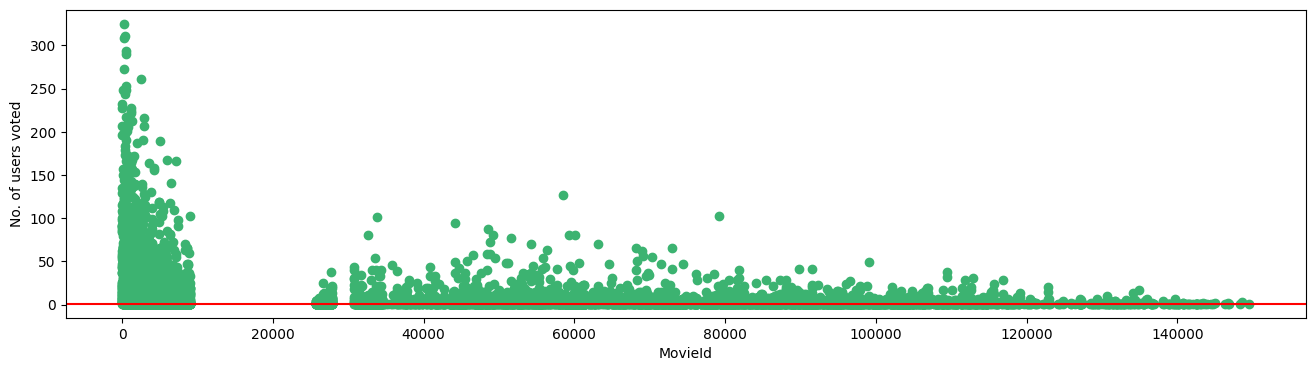

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=no_user_voted.min(),color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

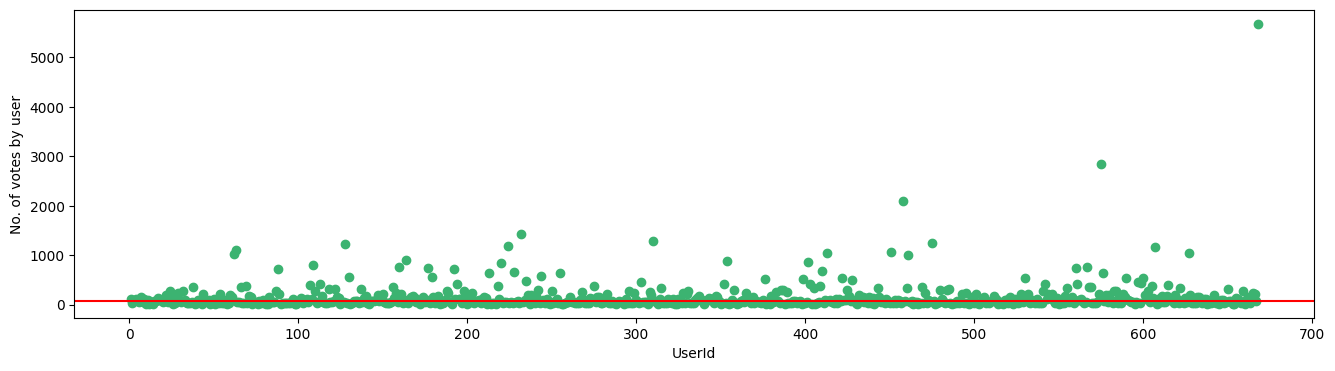

userId,movieId,1,3,4,7,9,11,15,16,17,...,656,657,659,661,662,664,665,666,667,668
0,1,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,3.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,3.0
2,3,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.5


In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > no_user_voted.min()].index,:]
final_dataset.head()
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=no_movies_voted.median(),color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > no_movies_voted.median()].index]
final_dataset.head()
from scipy.sparse import csr_matrix
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)
final_dataset.head()

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = df_movies[df_movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = df_movies[df_movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title':df_movies.iloc[idx]['title'].values[0],'Distance':val[1]})
        df = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df['Title']
    else:
        return "No movies found. Please check your input"

In [ ]:
import random
movie=random.choice(df_movies.title.unique())
print("Recommendation for movie :  {}\n".format(movie))
get_movie_recommendation(movie)

Recommendation for movie :  Twelve Chairs, The



,Title
1,Max Dugan Returns
2,Seems Like Old Times
3,Honeymoon in Vegas
4,They Might Be Giants
5,Murphy's Law
6,Stir Crazy
7,Summer of '42
8,High Anxiety
9,Never Cry Wolf
10,Hopscotch
